In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import rcParams

# 设置字体为黑体（SimHei）
rcParams['font.family'] = 'SimHei'
rcParams['font.sans-serif'] = ['SimHei']  # 黑体
rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

In [2]:
data = {
    '肿瘤大小（mm）': [5.0, 5.5, 7.0, 6.8, 5.2],
    '表面粗糙度': [2.0, 2.1, 2.5, 2.4, 2.1],
    '密度(g/cm³)': [1.5, 1.6, 2.0, 1.9, 1.5],
    '类别': [0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

In [5]:
mean_vectors = df.groupby('类别').mean().round(2)
mean_vectors

,肿瘤大小（mm）,表面粗糙度,密度(g/cm³)
类别,,,
0,5.23,2.07,1.53
1,6.90,2.45,1.95


In [6]:
μ0 = mean_vectors.loc[0].values  
μ1 = mean_vectors.loc[1].values  
print("μ0:", μ0)
print("μ1:", μ1)

μ0: [5.23 2.07 1.53]
μ1: [6.9  2.45 1.95]


In [9]:
# 计算全局均值向量
global_mean = df[['肿瘤大小（mm）', '表面粗糙度', '密度(g/cm³)']].mean().round(2)
μ = global_mean.values  
μ

array([5.9 , 2.22, 1.7 ])

In [10]:
S_W = np.zeros((3, 3))  # 3个特征
for label, group in df.groupby('类别'):
    # 获取均值向量
    mean_vector = mean_vectors.loc[label].values
    # 对每个样本计算散度
    for _, row in group.iterrows():
        x = row[['肿瘤大小（mm）', '表面粗糙度', '密度(g/cm³)']].values
        diff = (x - mean_vector).reshape(-1, 1)
        S_W += diff @ diff.T

# 打印类内散度矩阵
print("类内散度矩阵 S_W:\n", S_W)

类内散度矩阵 S_W:
 [[0.1467 0.0333 0.0367]
 [0.0333 0.0117 0.0083]
 [0.0367 0.0083 0.0117]]


In [12]:
S_B = np.zeros((3, 3))  # 3个特征
# 计算类间散度矩阵
for label, mean_vector in mean_vectors.iterrows():
    N_i = df[df['类别'] == label].shape[0]  # 类别 i 的样本数量
    mean_diff = (mean_vector.values - global_mean).to_numpy().reshape(-1, 1)  # 转换为 NumPy 数组并重塑
    S_B += N_i * (mean_diff @ mean_diff.T)

# 打印类间散度矩阵
print("类间散度矩阵 S_B:\n", S_B)

类间散度矩阵 S_B:
 [[3.3467 0.7615 0.8417]
 [0.7615 0.1733 0.1915]
 [0.8417 0.1915 0.2117]]


In [15]:
# 求解广义特征值问题，这行代码计算了广义特征值问题 𝑆𝐵𝑤=𝜆𝑆𝑊𝑤S的特征值和特征向量。
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# 获取特征值和特征向量的索引
sorted_indices = np.argsort(eigvals)[::-1]  # 从大到小排序
sorted_eigvecs = eigvecs[:, sorted_indices]

# 选择前 k 个特征向量（这里 k=1，表示一个投影方向）
w = sorted_eigvecs[:, 0]

# 投影数据
X_lda = df[['肿瘤大小（mm）', '表面粗糙度', '密度(g/cm³)']].dot(w)

# 打印结果
print("最优投影方向:", w)
print("投影后的数据:", X_lda)

最优投影方向: [-0.99663586 -0.02024677 -0.07941682]
投影后的数据: 0   -5.142798
1   -5.651082
2   -7.185902
3   -6.976608
4   -5.344150
dtype: float64


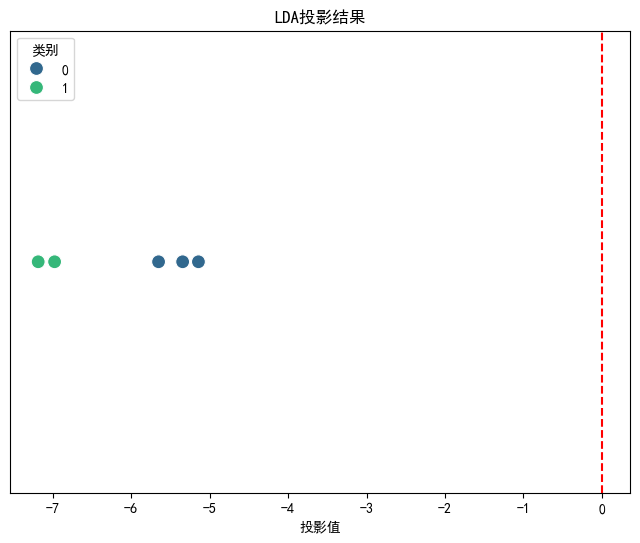

In [18]:
# 可视化投影结果
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda, y=np.zeros_like(X_lda), hue=df['类别'], palette='viridis', s=100)
plt.title('LDA投影结果')
plt.xlabel('投影值')
plt.yticks([])
plt.axvline(0, color='red', linestyle='--')  # 添加垂直线作为参考
plt.show()

In [ ]:
#y = wTx为数据投影公式

In [20]:
projected_values = np.array([-5.142798, -5.651082, -7.185902, -6.976608, -5.344150])
# 使用 NumPy 计算平均值
mean_value = np.mean(projected_values)

In [29]:
new = np.array([0.01, 2222.5, 2.0])
result = new.dot(w)
print(result)

-45.167239334666974


In [30]:
# 分类判断
if result < mean_value:  # 根据数据分布判断
    print("新病人被判断为: 恶性")
else:
    print("新病人被判断为: 良性")

新病人被判断为: 恶性
